# Cursos de Series de tiempo con *Machine Learning*
## Modulo . LSTM vs NeuralProphet
                        Elaborado por: Naren Castellon

<center><img src="./imagen/LSTM vs NeuralProphet.png" width="900" height="500"></center>

# **Contenido**

1. Introducción
2. Definición del Modelo
3. Caso de estudio: Forecasting anuncios publicitarios - Ads
4. Cargando librerias y datos
5. Análisis Exploratorio de Datos
6. Modelando con MLForecast
7. Evaluar el rendimiento del modelo.
8. Conclusión

# 1. Introducción

- ## Modelo LSTM:

Los modelos LSTM (Long Short-Term Memory) son una variante de las redes neuronales recurrentes (RNN) que se utilizan ampliamente en el campo del procesamiento del lenguaje natural y el análisis de secuencias. A diferencia de las RNN tradicionales, las LSTM tienen la capacidad de capturar y recordar dependencias a largo plazo en los datos secuenciales.

El principal desafío al trabajar con secuencias de datos es la pérdida de información relevante a medida que se propagan a través de las capas de la red neuronal. Las LSTM abordan este problema mediante el uso de una estructura de celda especializada con puertas de entrada, salida y olvido. Estas puertas permiten que la información relevante fluya a través de la red y se mantenga durante largos períodos de tiempo.

La capacidad de las LSTM para modelar dependencias a largo plazo las hace especialmente adecuadas para tareas como la generación de texto, la traducción automática, el reconocimiento de voz y el análisis de series temporales. Al capturar las relaciones temporales en los datos, las LSTM pueden predecir patrones y tendencias en secuencias de tiempo, lo que las convierte en una herramienta valiosa para el forecasting y la predicción de series temporales.

- ## Modelo NeuralProphet:

NeuralProphet es una biblioteca de código abierto desarrollada por Facebook que combina elementos de los modelos de redes neuronales y los modelos clásicos de series temporales. Está diseñada específicamente para el análisis y la predicción de series temporales, y proporciona una interfaz sencilla y flexible para trabajar con datos secuenciales.

Una de las características clave de NeuralProphet es su enfoque en la simplicidad y la facilidad de uso. Proporciona una API intuitiva basada en Python que permite a los usuarios entrenar y ajustar modelos de series temporales de manera eficiente, incluso con poca experiencia en el campo del análisis de datos. Además, NeuralProphet automatiza gran parte del proceso de selección de características y ajuste de hiperparámetros, lo que facilita la implementación de modelos precisos y eficaces.

El modelo NeuralProphet se basa en una combinación de componentes clave, como modelos de tendencia, estacionalidad y regresión, junto con una arquitectura de red neuronal subyacente. Esto permite capturar relaciones complejas en los datos de series temporales, así como modelar patrones estacionales y tendencias no lineales.

NeuralProphet ha demostrado ser eficaz en diversas aplicaciones, como el forecasting de ventas, la predicción de demanda, el análisis de datos climáticos y la predicción de precios de acciones. Al aprovechar los beneficios de los modelos de redes neuronales y las técnicas de series temporales clásicas, NeuralProphet ofrece una solución potente y accesible para el análisis y la predicción de series temporales.

# 2. Definición del Modelo

- ### **Modelo LSTM:**

El modelo LSTM se compone de varias unidades de memoria llamadas celdas LSTM. Cada celda LSTM tiene tres puertas: la puerta de entrada (input gate), la puerta de olvido (forget gate) y la puerta de salida (output gate). Estas puertas están diseñadas para controlar el flujo de información en la celda y permitir que se mantengan dependencias a largo plazo en las secuencias de datos.

La ecuación matemática que describe una celda LSTM en un instante de tiempo t es la siguiente:

$$i_t = sigmoid(W_i * x_t + U_i * h_{t-1} + b_i)$$

$$f_t = sigmoid(W_f * x_t + U_f * h_{t-1} + b_f)$$

$$o_t = sigmoid(W_o * x_t + U_o * h_{t-1} + b_o)$$

$$c_t = f_t * c_{t-1} + i_t * tanh(W_c * x_t + U_c * h_{t-1} + b_c)$$

$$h_t = o_t * tanh(c_t)$$

Donde:
- $x_t$ es el vector de entrada en el instante de tiempo t.
- $h_{t-1}$ es el vector de salida de la celda LSTM en el instante de tiempo anterior t-1.
- $i_t, f_t$ y $o_t$ son los vectores de activación de las puertas de entrada, olvido y salida, respectivamente.
- $c_t$ es el vector de la memoria de la celda LSTM en el instante de tiempo t.
- $W_i, W_f, W_o, W_c$ son las matrices de pesos que se aplican a la entrada x_t.
- $U_i, U_f, U_o, U_c$ son las matrices de pesos que se aplican al vector de salida h_{t-1}.
- $b_i, b_f, b_o, b_c$ son los vectores de sesgo (bias).

La función sigmoid se refiere a la función de activación sigmoide, que se utiliza para generar valores entre 0 y 1. La función tanh se refiere a la función de activación tangente hiperbólica, que produce valores entre -1 y 1.

- ### **Modelo NeuralProphet:**

El modelo NeuralProphet utiliza una combinación de modelos de tendencia, estacionalidad y regresión, junto con una arquitectura de red neuronal subyacente. A continuación, se describen matemáticamente los componentes principales del modelo:

1. Modelo de tendencia:
El modelo de tendencia captura la evolución general de la serie temporal a lo largo del tiempo. Se puede utilizar una función lineal o una función logística para modelar la tendencia. Por ejemplo, para una función lineal, la ecuación matemática sería:

$$trend_t = m * t + k$$

Donde:
- trend_t es el valor de la tendencia en el instante de tiempo t.
- m es la pendiente de la tendencia.
- t es el instante de tiempo.
- k es el término de desplazamiento o intercepción.

2. Modelo de estacionalidad:
El modelo de estacionalidad captura patrones repetitivos en la serie temporal, como estacionalidad diaria, semanal o anual. Puede utilizar funciones sinusoidales para modelar la estacionalidad. Por ejemplo, para una estacionalidad diaria, la ecuación matemática sería:

$$season_t = \sum_{i=1}^{n} a_i * sin(2π * i * t / P) + b_i * cos(2π * i * t / P)$$

Donde:
- season_t es el valor de la estacionalidad en el instante de tiempo t.
- a_i y b_i son los coeficientes de amplitud de las funciones sinusoidales.
- i es el número de armónicos de estacionalidad.
- P es el período de la estacionalidad.

3. Modelo de regresión:
El modelo de regresión permite incluir variables explicativas adicionales que puedan influir en la serie temporal. Puede utilizar una función lineal o no lineal para modelar la relación entre las variables explicativas y la serie temporal. Por ejemplo, para una función lineal de regresión, la ecuación matemática sería:

$$regression_t = \sum_{j=1}^{m} β_j * x_{tj}$$

Donde:
- regression_t es el valor de la regresión en el instante de tiempo t.
- β_j son los coeficientes de regresión que representan la relación entre las variables explicativas x_{tj} y la serie temporal.
- m es el númerode variables explicativas.

4. Modelo de error:
El modelo de error captura el error residual o la diferencia entre el valor observado y el valor predicho por los modelos de tendencia, estacionalidad y regresión. Puede seguir una distribución gaussiana o cualquier otra distribución apropiada para los datos. Por ejemplo, para un modelo de error gaussiano, la ecuación matemática sería:

$$error_t ~ N(0, σ^2)$$

Donde:
- error_t es el error en el instante de tiempo t.
- N(0, σ^2) es una distribución gaussiana con media cero y varianza σ^2.

El modelo NeuralProphet combina todos estos componentes y utiliza técnicas de optimización para ajustar los parámetros del modelo y minimizar el error entre los valores observados y los valores predichos. El proceso de optimización se realiza mediante métodos como el descenso de gradiente estocástico (SGD) o el algoritmo de Adam para encontrar los mejores valores para los parámetros del modelo.

# 3. Caso de estudio: Forecasting de anuncios publicitarios para una empresa de comercio electrónico


En este caso de estudio, exploraremos cómo una empresa de comercio electrónico puede utilizar técnicas de forecasting (pronóstico) para predecir la efectividad y el rendimiento de sus anuncios publicitarios. El objetivo es optimizar la asignación de recursos publicitarios y maximizar el retorno de la inversión (ROI) en campañas publicitarias.

Introducción:
La empresa XYZ es una plataforma de comercio electrónico que vende una amplia gama de productos en línea. Para aumentar su visibilidad y atraer a más clientes, la empresa invierte en campañas publicitarias en diferentes canales, como anuncios en motores de búsqueda, redes sociales y publicidad display. Sin embargo, asignar eficientemente los recursos publicitarios y determinar la mejor combinación de canales y presupuesto es un desafío.

Objetivos:
1. Pronosticar el rendimiento de los anuncios publicitarios en términos de conversiones, ventas y ROI.
2. Identificar los canales publicitarios más efectivos y asignar adecuadamente el presupuesto publicitario en cada uno de ellos.
3. Optimizar la planificación y ejecución de campañas publicitarias para maximizar el ROI.

Datos:
La empresa XYZ ha recopilado datos históricos detallados de sus campañas publicitarias, que incluyen información sobre los canales publicitarios utilizados, los gastos publicitarios, las impresiones, los clics, las conversiones y las ventas generadas. Los datos también contienen variables relevantes como la fecha y la segmentación demográfica.

Metodología:
1. Análisis exploratorio de datos: Se realizará un análisis exhaustivo de los datos históricos para comprender las tendencias, patrones estacionales y relaciones entre las variables.
2. Ingeniería de características: Se crearán características adicionales, como indicadores estacionales, características de días festivos y características de interacción entre los canales publicitarios.
3. Selección del modelo: Se probarán diferentes técnicas de pronóstico, como modelos de series temporales (ARIMA, SARIMA), modelos de regresión (regresión lineal, regresión logística) y algoritmos de aprendizaje automático (regresión de bosques aleatorios, redes neuronales).
4. Validación y ajuste del modelo: Se utilizarán técnicas de validación cruzada y métricas de evaluación, como el error medio absoluto (MAE) y el error porcentual absoluto medio (MAPE), para seleccionar y ajustar el modelo más adecuado.
5. Pronóstico y optimización: Se utilizará el modelo seleccionado para pronosticar el rendimiento futuro de los anuncios publicitarios y se realizará un análisis de sensibilidad para optimizar la asignación de presupuesto publicitario en cada canal.

Resultados esperados:
Después de aplicar el modelo de forecasting de ads, la empresa XYZ podrá:
- Pronosticar el rendimiento de los anuncios publicitarios, lo que permitirá una planificación más precisa y una toma de decisiones informada.
- Identificar los canales publicitarios más efectivos y asignar el presupuesto publicitario de manera óptima para maximizar el ROI.
- Realizar ajustes en tiempo real según los cambios en las tendencias y el comportamiento de los clientes.

Conclusión:
El forecasting de anuncios publicitarios se convierte en una herramienta poderosa para las empresas de comercio electrónico, como XYZ, al permitirles predecir y optimizar el rendimiento de sus campañas publicitarias. Al aplicar técnicas de pronóstico y análisis en los datos históricos, la empresa puede tomar decisiones más inteligentes y estratégicas en términos de asignación de recursos, maximizando así el retorno de la inversión en publicidad y mejorando su posición competitiva en el mercado.

# 4. Cargando librerias y datos


In [1]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [1]:
# Manipulación y tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Statsmodels 
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Plots
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Stile y color
# ==============================================================================
plt.style.use('fivethirtyeight') # fivethirtyeight  grayscale  classic
dark_style = {
    'axes.facecolor':'#484366'}  # '#484366'  '#008080' "#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af" 
plt.rcParams.update(dark_style)

# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


# No presentar advertencia
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Herramientas de Forecast
# ==============================================================================

from utilsforecast.plotting import plot_series
from utilsforecast.preprocessing import fill_gaps

# NeuralForecast
#===========================================================================
import neuralforecast
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN
from neuralforecast.models import GRU, RNN
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss, GMM, HuberMQLoss
from neuralforecast.losses.pytorch import MSE, MAE
from mlforecast.target_transforms import LocalRobustScaler, LocalStandardScaler


from neuralforecast.models import Informer, Autoformer, FEDformer, PatchTST
from neuralforecast.auto import AutoRNN, AutoLSTM
from ray import tune
import pytorch_lightning as pl

In [4]:
neuralforecast.__version__

'1.7.2'

In [5]:
pl.__version__

'2.3.0'

## Cargando datos

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/ads.csv", parse_dates=["Time"])
data.head()

,Time,Ads
0,2017-09-13 00:00:00,80115
1,2017-09-13 01:00:00,79885
2,2017-09-13 02:00:00,89325
3,2017-09-13 03:00:00,101930
4,2017-09-13 04:00:00,121630


In [3]:
data.tail()

,Time,Ads
211,2017-09-21 19:00:00,155890
212,2017-09-21 20:00:00,123395
213,2017-09-21 21:00:00,103080
214,2017-09-21 22:00:00,95155
215,2017-09-21 23:00:00,80285


In [4]:
data.dtypes

Time    datetime64[ns]
Ads              int64
dtype: object

Podemos ver claramente que este marco de datos contiene una columna 'Fecha' que debe cambiarse al formato de 'fecha y hora' de Pandas.

In [5]:
data['Time'] = pd.to_datetime(data.Time)

Renombrando las variables

In [6]:
data["unique_id"]="1"
data.columns=["ds", "y", "unique_id"]
data.head()

,ds,y,unique_id
0,2017-09-13 00:00:00,80115,1
1,2017-09-13 01:00:00,79885,1
2,2017-09-13 02:00:00,89325,1
3,2017-09-13 03:00:00,101930,1
4,2017-09-13 04:00:00,121630,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         216 non-null    datetime64[ns]
 1   y          216 non-null    int64         
 2   unique_id  216 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.2+ KB


# 5. Análisis Exploratorio de Datos


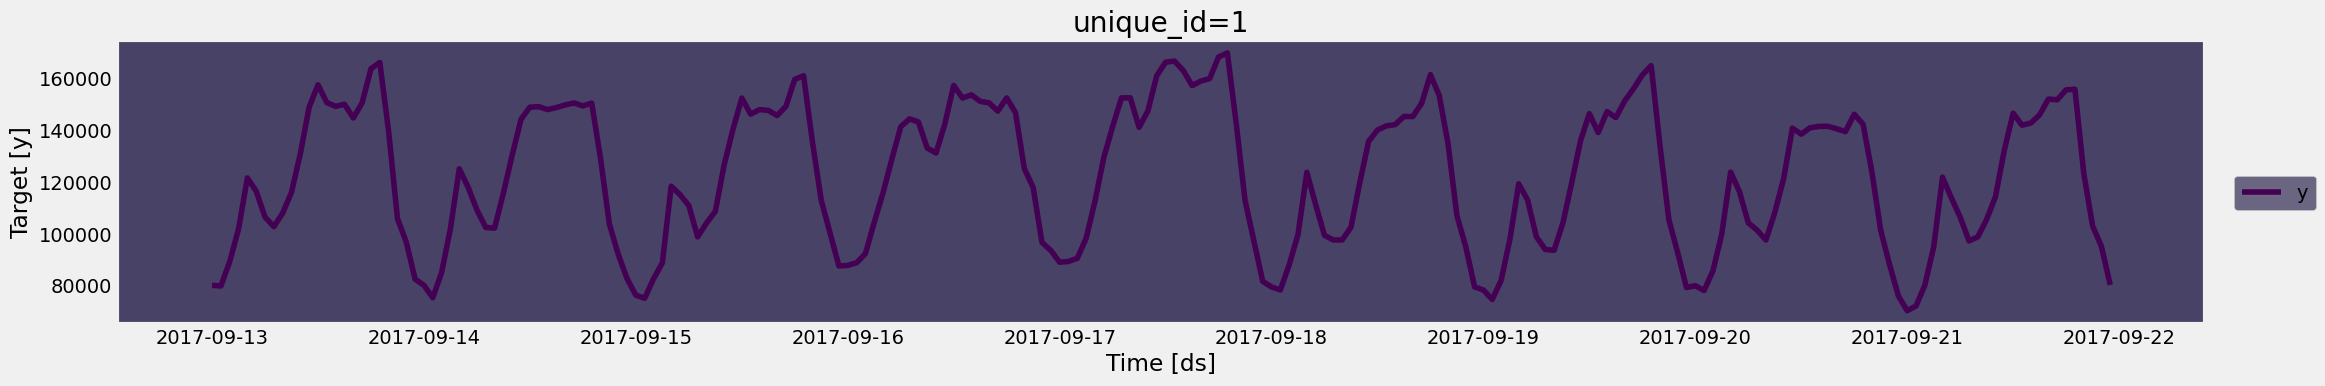

In [12]:
plot_series(data)

## AutoCorrelacion 

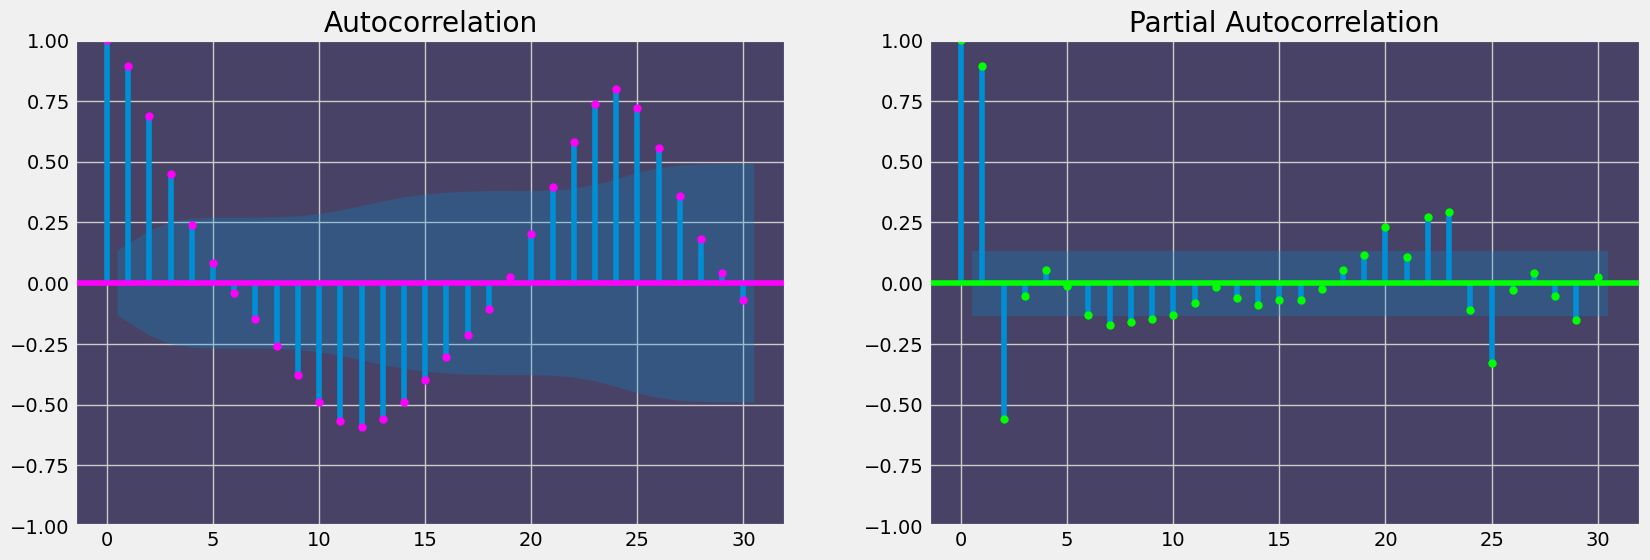

In [13]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))

plot_acf(data["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(data["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

## Descomponiendo las serie de tiempo

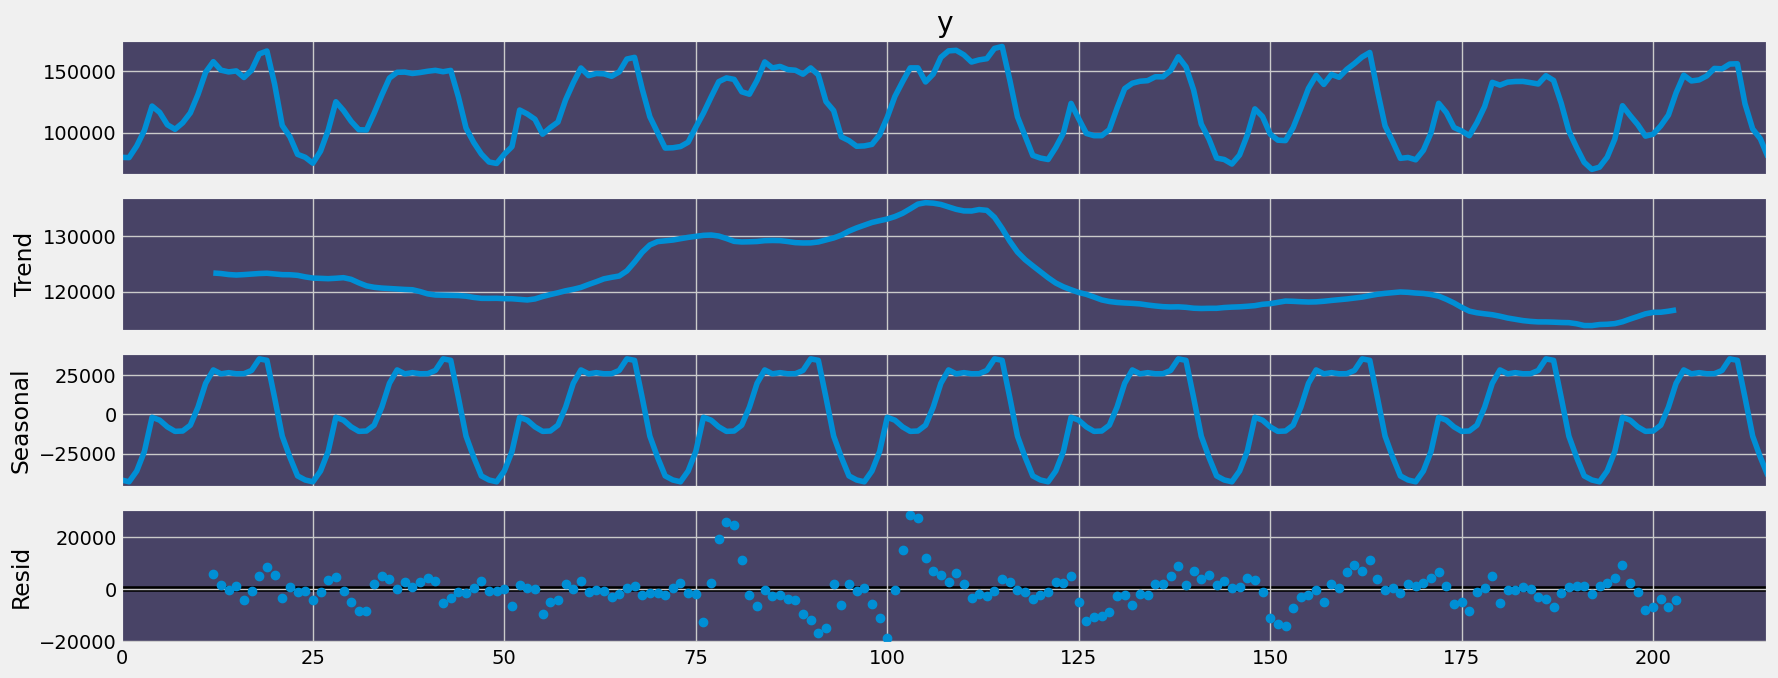

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose 

a = seasonal_decompose(data["y"], model = "additive", period=24)
a.plot();


In [16]:
from scipy.stats import mode, norm, skew

Text(0, 0.5, 'Frequency')

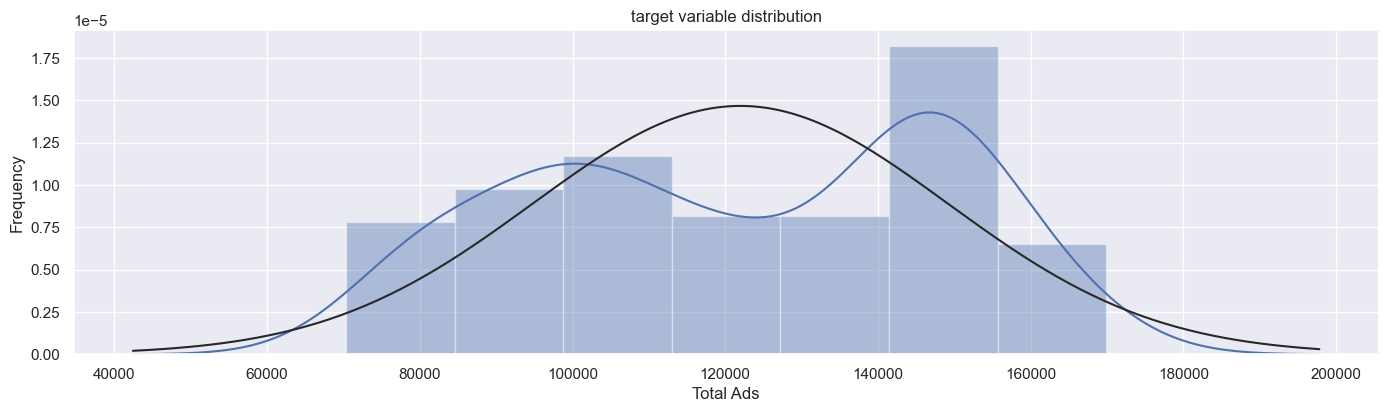

In [17]:
sns.set(rc={"figure.figsize":(15, 4)})
sns.distplot(data[['y']], fit= norm)
plt.title("target variable distribution")
plt.xlabel("Total Ads")
plt.ylabel("Frequency")

## **Prueba de Estacionariedad**

In [18]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [19]:
Augmented_Dickey_Fuller_Test_func(data["y"],'Ads')

Dickey-Fuller test results for columns: Ads
Test Statistic                -7.089634e+00
p-value                        4.444804e-10
No Lags Used                   9.000000e+00
Number of observations used    2.060000e+02
Critical Value (1%)           -3.462499e+00
Critical Value (5%)           -2.875675e+00
Critical Value (10%)          -2.574304e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


## **Split the data into training and testing** 


Dividamos nuestros datos en conjuntos.
1. Datos para entrenar nuestro modelo `LSTM` y `NeuralProphet`.
2. Datos para probar nuestro modelo.

Para los datos de prueba usaremos las últimas 30 horas para probar y evaluar el rendimiento de nuestro modelo.

In [20]:
train = data[data.ds<= '2017-09-20 17:00:00'] 
test = data[(data['ds'] > '2017-09-20 17:00:00')]

#test.drop("y",axis=1, inplace=True)
train.shape, test.shape

((186, 3), (30, 3))

In [21]:
train

,ds,y,unique_id
0,2017-09-13 00:00:00,80115,1
1,2017-09-13 01:00:00,79885,1
2,2017-09-13 02:00:00,89325,1
3,2017-09-13 03:00:00,101930,1
4,2017-09-13 04:00:00,121630,1
...,...,...,...
181,2017-09-20 13:00:00,140990,1
182,2017-09-20 14:00:00,141525,1
183,2017-09-20 15:00:00,141590,1
184,2017-09-20 16:00:00,140610,1


In [22]:
test

,ds,y,unique_id
186,2017-09-20 18:00:00,146215,1
187,2017-09-20 19:00:00,142425,1
188,2017-09-20 20:00:00,123945,1
189,2017-09-20 21:00:00,101360,1
190,2017-09-20 22:00:00,88170,1
191,2017-09-20 23:00:00,76050,1
192,2017-09-21 00:00:00,70335,1
193,2017-09-21 01:00:00,72150,1
194,2017-09-21 02:00:00,80195,1
195,2017-09-21 03:00:00,94945,1


Ahora tracemos los datos de entrenamiento y los datos de prueba.

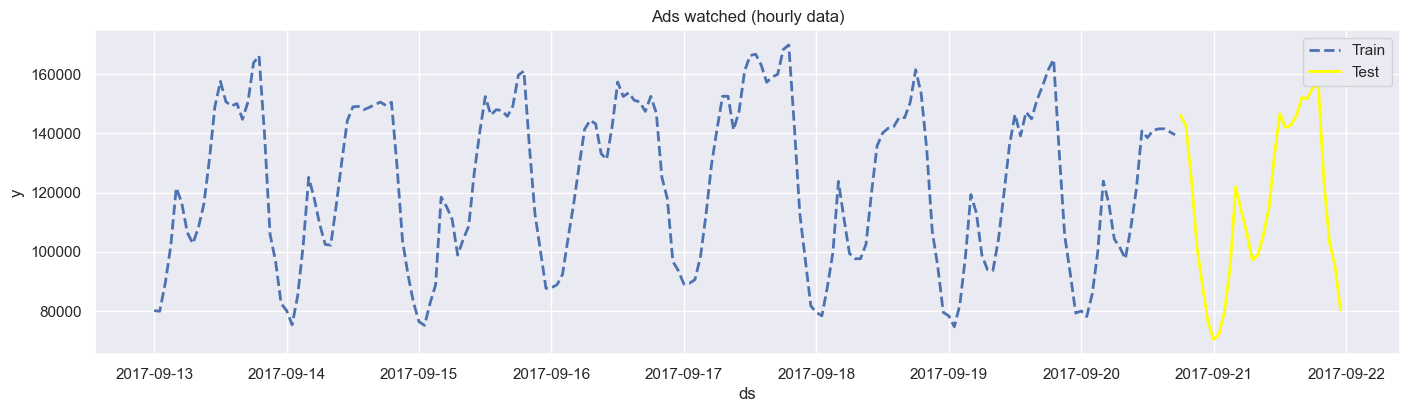

In [23]:
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--",linewidth=2)
sns.lineplot(test, x="ds", y="y", label="Test", linewidth=2, color="yellow")
plt.title("Ads watched (hourly data)");
plt.show()

# 6. Modelando con NeuralForecast - LSTM

## **Construyendo el Modelo**

In [31]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

models = models=[LSTM(h = 30,                                                     #  forecast horizon.
                 input_size=-1,
                 loss = DistributionLoss(distribution='Normal', level=[80, 95]),
                 #loss=GMM(n_components=7, return_params=True, level=[80,90]),
                 #loss=MQLoss(level=[80, 90]),
                 #loss=HuberMQLoss(quantiles=quantiles),    # Robust Huber Loss
                 #valid_loss=MQLoss(quantiles=quantiles),   # Validation signal
                 #loss =  MAE(),
                 scaler_type='robust',                                          # Tipo de escalador para la normalización de entradas temporales.
                 encoder_n_layers = 2,                                            # Número de capas para el LSTM. int = 2
                 encoder_hidden_size = 200,                                     # unidades para el tamaño del estado oculto del LSTM. int = 200
                 context_size=10,                                               # tamaño del vector de contexto para cada marca de tiempo en la ventana de pronóstico, int = 10
                 decoder_hidden_size = 800,                                       # Tamaño de la capa oculta para el decodificador MLP.int = 200
                 decoder_layers = 2,                                              # Número de capas para el decodificador MLP. int = 2
                 max_steps = 300,                                                 # Número máximo de pasos de entrenamiento. int = 1000
                 #val_check_steps = 200,
                 #batch_size = 32,
                
                 #futr_exog_list = ,
                 #hist_exog_list = ,
                 #stat_exog_list = ,
                 )]

Seed set to 1


In [32]:
nf = NeuralForecast(models = models, freq = 'H')

## **Entrenando el Modelo**

In [33]:
# fit the models
nf.fit(df = train)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 5      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 60.3 K | train
5 | mlp_decoder     | MLP              | 10.4 K | train
-------------------------------------------------------------
554 K     Trainable params
5         Non-trainable params
554 K     Total params
2.219     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=300` reached.


## **Predicciones del Modelo**

In [34]:
forecast_df = nf.predict()

forecast_df

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,LSTM,LSTM-median,LSTM-lo-95,LSTM-lo-80,LSTM-hi-80,LSTM-hi-95
unique_id,,,,,,,
1,2017-09-20 18:00:00,159664.171875,155190.687500,164321.703125,158338.078125,166974.171875,165114.078125
1,2017-09-20 19:00:00,157150.218750,153421.093750,152979.718750,166628.656250,153528.062500,146033.062500
1,2017-09-20 20:00:00,131552.906250,134110.656250,136025.218750,135905.593750,138301.109375,140231.796875
1,2017-09-20 21:00:00,107793.156250,104693.125000,119840.054688,107030.914062,114807.992188,109724.085938
1,2017-09-20 22:00:00,93776.664062,96344.671875,100136.046875,78529.945312,98963.875000,97244.593750
1,2017-09-20 23:00:00,84846.117188,78740.453125,84532.812500,86148.468750,87305.125000,92105.046875
1,2017-09-21 00:00:00,80720.468750,80610.257812,86882.710938,75784.968750,72668.273438,79382.351562
1,2017-09-21 01:00:00,81421.273438,86846.750000,69337.523438,73624.390625,78300.585938,84058.187500
1,2017-09-21 02:00:00,87063.796875,87869.593750,91530.640625,90333.515625,85269.187500,81414.023438


In [35]:
dark_style = {
    'figure.facecolor': '333333', ##212946'
    'axes.facecolor': '333333',
    'savefig.facecolor':'333333',
    'axes.grid': True,
    'axes.grid.which': 'both',
   
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

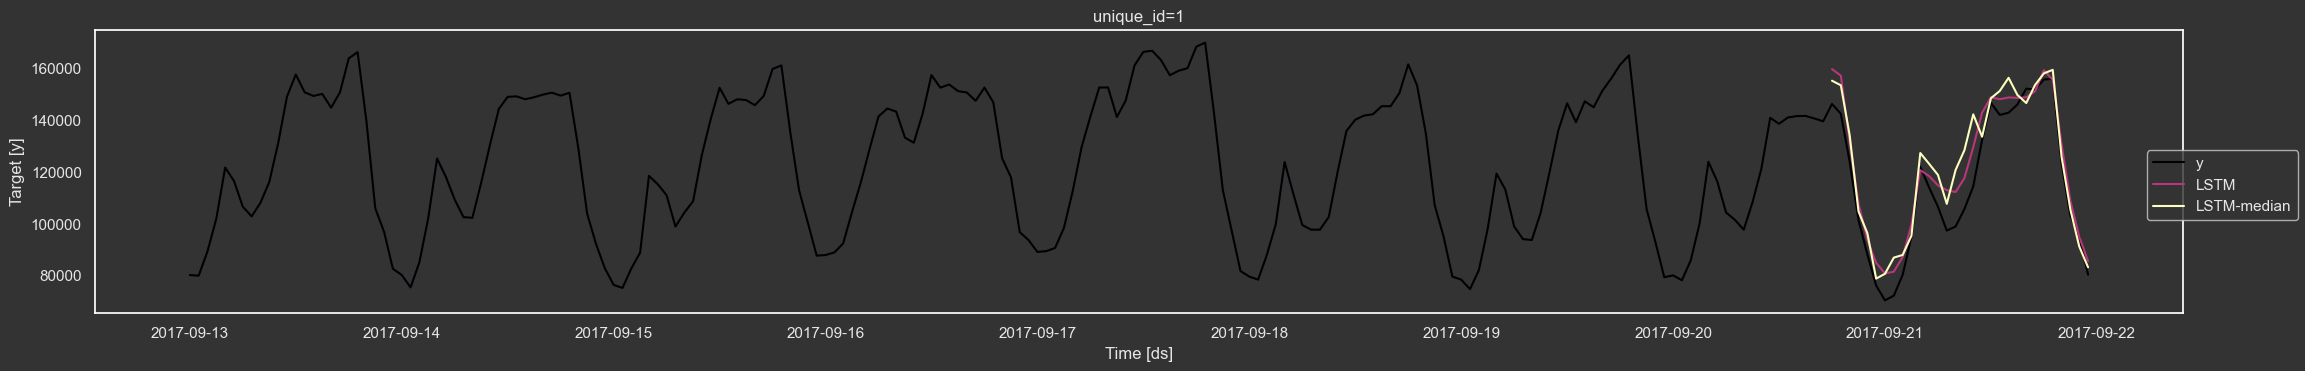

In [36]:
plot_series(data, forecast_df.reset_index(),  max_insample_length = 300,   palette="magma" )

# 7. Evaluar el rendimiento del modelo.

## **Perform time series cross-validation**


In [37]:
cv_result = nf.cross_validation(
    train,
    n_windows = 3,  # number of models to train/splits to perform
    )

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | loss            | DistributionLoss | 5      | train
1 | padder          | ConstantPad1d    | 0      | train
2 | scaler          | TemporalNorm     | 0      | train
3 | hist_encoder    | LSTM             | 484 K  | train
4 | context_adapter | Linear           | 60.3 K | train
5 | mlp_decoder     | MLP              | 10.4 K | train
-------------------------------------------------------------
554 K     Trainable params
5         Non-trainable params
554 K     Total params
2.219     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=300` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [38]:
cv_result.head()

,ds,cutoff,LSTM,LSTM-median,LSTM-lo-95,LSTM-lo-80,LSTM-hi-80,LSTM-hi-95,y
unique_id,,,,,,,,,
1,2017-09-19 10:00:00,2017-09-19 09:00:00,122846.054688,125320.43750,122673.742188,118369.796875,112406.281250,132324.750000,119750
1,2017-09-19 11:00:00,2017-09-19 09:00:00,140715.515625,139366.90625,137030.218750,138817.015625,143280.843750,135881.796875,135990
1,2017-09-19 12:00:00,2017-09-19 09:00:00,150423.937500,145425.90625,149945.250000,143926.781250,145715.796875,152747.609375,146455
1,2017-09-19 13:00:00,2017-09-19 09:00:00,149720.078125,157831.31250,146582.906250,150393.375000,152532.437500,145131.000000,139165
1,2017-09-19 14:00:00,2017-09-19 09:00:00,148464.734375,146666.06250,147363.765625,144763.468750,150625.593750,142570.781250,147225


## **Evaluando el Modelo**



Ahora podemos calcular la precisión del pronóstico utilizando una métrica de precisión adecuada. Aquí usaremos el error cuadrático medio (RMSE). Para hacer esto, primero necesitamos "instalar datasetsforecast", una biblioteca de Python desarrollada **por Nixtla** que incluye una función para calcular el RMSE.

`pip install datasetsforecast`

In [39]:
from datasetsforecast.losses import mse, mae, rmse, smape

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [40]:
evaluation_df = evaluate_cross_validation(cv_result, rmse)

evaluation_df

,LSTM,LSTM-median,LSTM-lo-95,LSTM-lo-80,LSTM-hi-80,LSTM-hi-95,best_model
unique_id,,,,,,,
1,16215.952182,16702.393161,18264.125595,17987.874981,16933.061186,17557.349076,LSTM


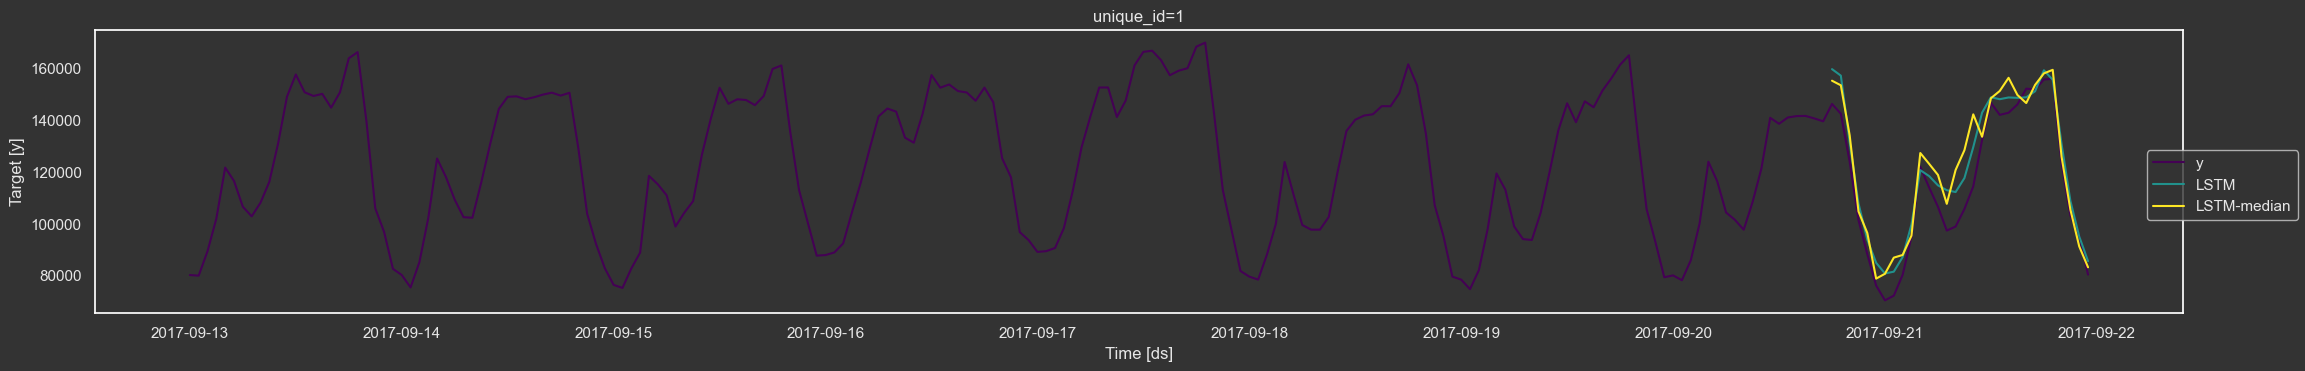

In [42]:
plot_series(data, forecast_df.reset_index(), max_insample_length= 300)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def metricas(y_true, y_pred, model_name):
    mae_ = mean_absolute_error(y_true, y_pred)
    rmse_ = mean_squared_error(y_true, y_pred, )
    mape_ = mean_absolute_percentage_error(y_true, y_pred)
    smape_ = mean_absolute_percentage_error(y_true, y_pred,)
    r2_ = r2_score(y_true, y_pred)
    
    dict_ = {'MAE': mae_, 'RMSE': rmse_, 
             'MAPE': mape_, 'SMAPE': smape_, "R2":r2_}
    
    metrica1 = pd.DataFrame(dict_, index = [model_name])
    return(metrica1.round(decimals = 4))

In [45]:
metricas(test["y"], forecast_df["LSTM"], "NeuralForecast")

,MAE,RMSE,MAPE,SMAPE,R2
NeuralForecast,7045.5737,6.947977e+07,0.0669,0.0669,0.9055


In [21]:
metricas(test1["y"], forecast["yhat1"][-30:], "NeuralProphet")

,MAE,RMSE,MAPE,SMAPE,R2
NeuralProphet,4886.1408,3.386033e+07,0.0441,0.0441,0.9539


# 8. NeuralProphet

Hacemos una copia de los datos

In [8]:
data1 =data[["ds", "y"]]
data1.tail()

,ds,y
211,2017-09-21 19:00:00,155890
212,2017-09-21 20:00:00,123395
213,2017-09-21 21:00:00,103080
214,2017-09-21 22:00:00,95155
215,2017-09-21 23:00:00,80285


## **División de los Datos en Entrenamiento y en Prueba** 


Dividamos nuestros datos en conjuntos.
1. Datos para entrenar nuestro modelo `LSTM` y `NeuralProphet`.
2. Datos para probar nuestro modelo.

Para los datos de prueba usaremos las últimas 30 horas para probar y evaluar el rendimiento de nuestro modelo.

In [9]:
train1 = data1[data1.ds<= '2017-09-20 17:00:00'] 
test1 = data1[(data1['ds'] > '2017-09-20 17:00:00')]

#test.drop("y",axis=1, inplace=True)
train1.shape, test1.shape

((186, 2), (30, 2))

## Cargamos la libreria

In [10]:
from neuralprophet import NeuralProphet, set_log_level
#from prophet.plot import plot_plotly, plot_components_plotly

set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


- ## Llamamos al moelo

In [11]:
m = NeuralProphet()

- ## Entrenamos al Modelo

In [12]:
# Entrenamos al modelo con los datos de entrenamiento
m.fit(train1, freq = "H") 

Finding best initial lr: 100%|██████████| 211/211 [00:00<00:00, 512.83it/s]


Epoch 200: 100%|██████████| 200/200 [00:00<00:00, 9331.35it/s, loss=0.00789, v_num=111, MAE=4.91e+3, RMSE=6.87e+3, Loss=0.00858, RegLoss=0.000]  


,MAE,RMSE,Loss,RegLoss,epoch
0,45952.562500,57017.128906,0.292559,0.0,0
1,42906.308594,53302.886719,0.267522,0.0,1
2,38386.933594,48730.863281,0.230195,0.0,2
3,34698.914062,44121.437500,0.201416,0.0,3
4,31132.322266,40539.214844,0.174348,0.0,4
...,...,...,...,...,...
195,4904.227051,6804.146484,0.008472,0.0,195
196,4900.490234,6728.585938,0.008460,0.0,196
197,4910.521973,6715.894043,0.008461,0.0,197
198,4882.819824,6747.140625,0.008489,0.0,198


- ## Creamos los valores futuros

In [13]:
df_future = m.make_future_dataframe(train1, periods = 30, n_historic_predictions = True,  )  # n_historic_predictions = True,
df_future

,ds,y
0,2017-09-13 00:00:00,80115
1,2017-09-13 01:00:00,79885
2,2017-09-13 02:00:00,89325
3,2017-09-13 03:00:00,101930
4,2017-09-13 04:00:00,121630
...,...,...
211,2017-09-21 19:00:00,None
212,2017-09-21 20:00:00,None
213,2017-09-21 21:00:00,None
214,2017-09-21 22:00:00,None


- ## Forecasting del Modelo

In [14]:
# Predict the future
forecast = m.predict(df_future)
forecast

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 443.65it/s]


,ds,y,yhat1,trend,season_daily
0,2017-09-13 00:00:00,80115,84049.988281,124770.062500,-40720.070312
1,2017-09-13 01:00:00,79885,80802.783691,124641.828125,-43839.050781
2,2017-09-13 02:00:00,89325,87486.001953,124513.609375,-37027.601562
3,2017-09-13 03:00:00,101930,104933.539062,124385.375000,-19451.841797
4,2017-09-13 04:00:00,121630,118273.441406,124257.148438,-5983.710938
...,...,...,...,...,...
211,2017-09-21 19:00:00,None,152995.070312,118586.234375,34408.835938
212,2017-09-21 20:00:00,None,133809.753906,118606.078125,15203.678711
213,2017-09-21 21:00:00,None,106020.164062,118625.921875,-12605.760742
214,2017-09-21 22:00:00,None,88719.084961,118645.765625,-29926.679688


In [15]:
#m.set_plotting_backend("plotly-static")
m.plot(forecast, figsize=(16,7))

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


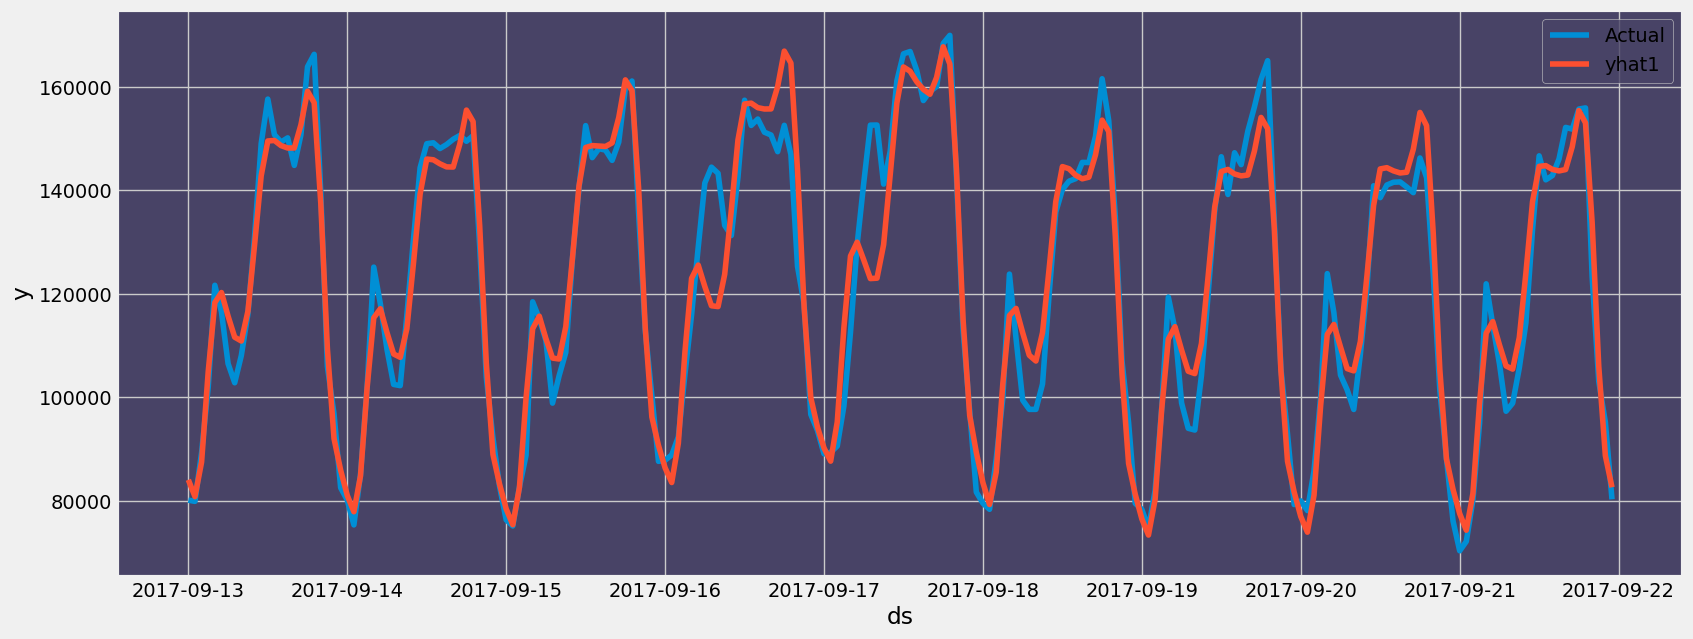

In [16]:
#plt.figure(figsize=(18,7))
sns.lineplot(data = data1, x = "ds", y = "y", label = "Actual")
sns.lineplot(data = forecast, x = "ds", y = "yhat1", label = "yhat1")
#sns.lineplot(data = forecast, x = "ds", y = "trend", label="Trend", color="lime")
#sns.lineplot(data = forecast, x = "ds", y = "season_yearly", label = "season_yearly", )
#plt.title("Forecasting - Shrimp - Prices")
#plt.grid(True)
plt.show()

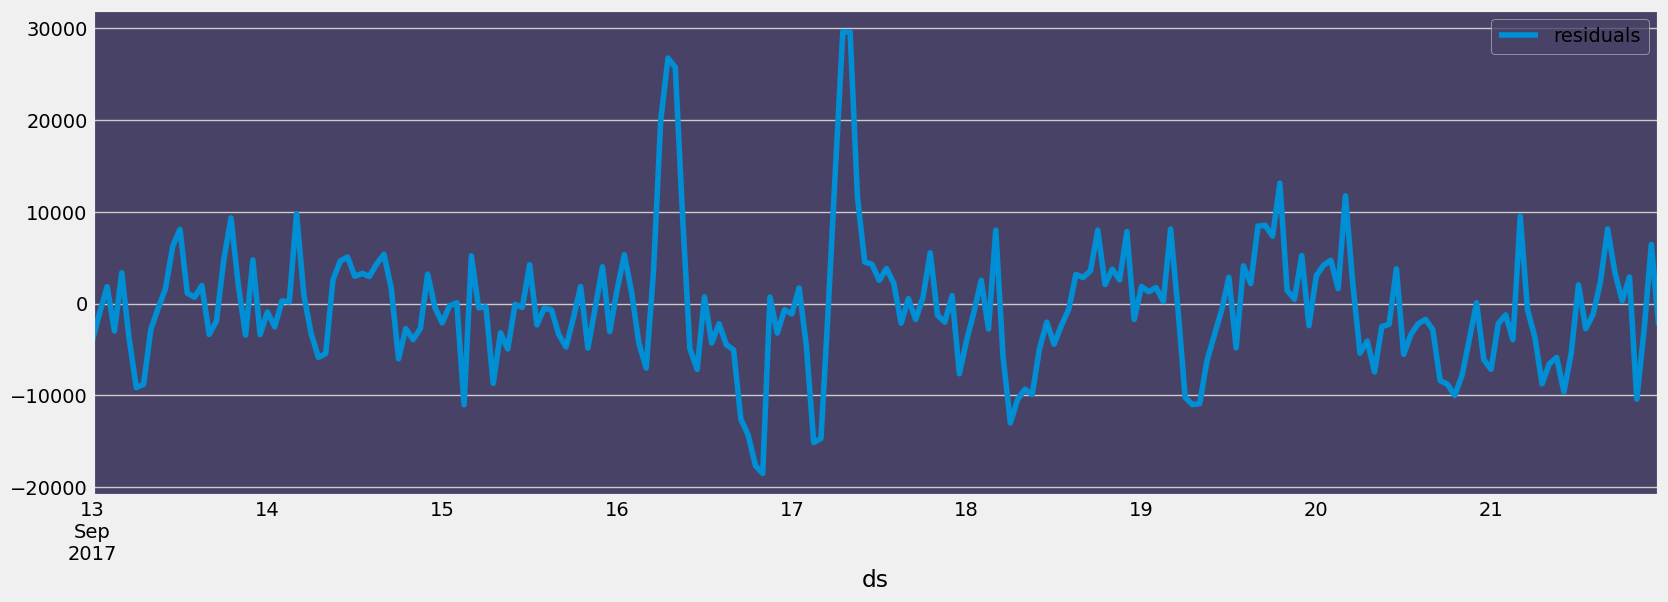

In [17]:
df_residuals = pd.DataFrame({"ds": data1["ds"], "residuals": data1["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(18, 6))

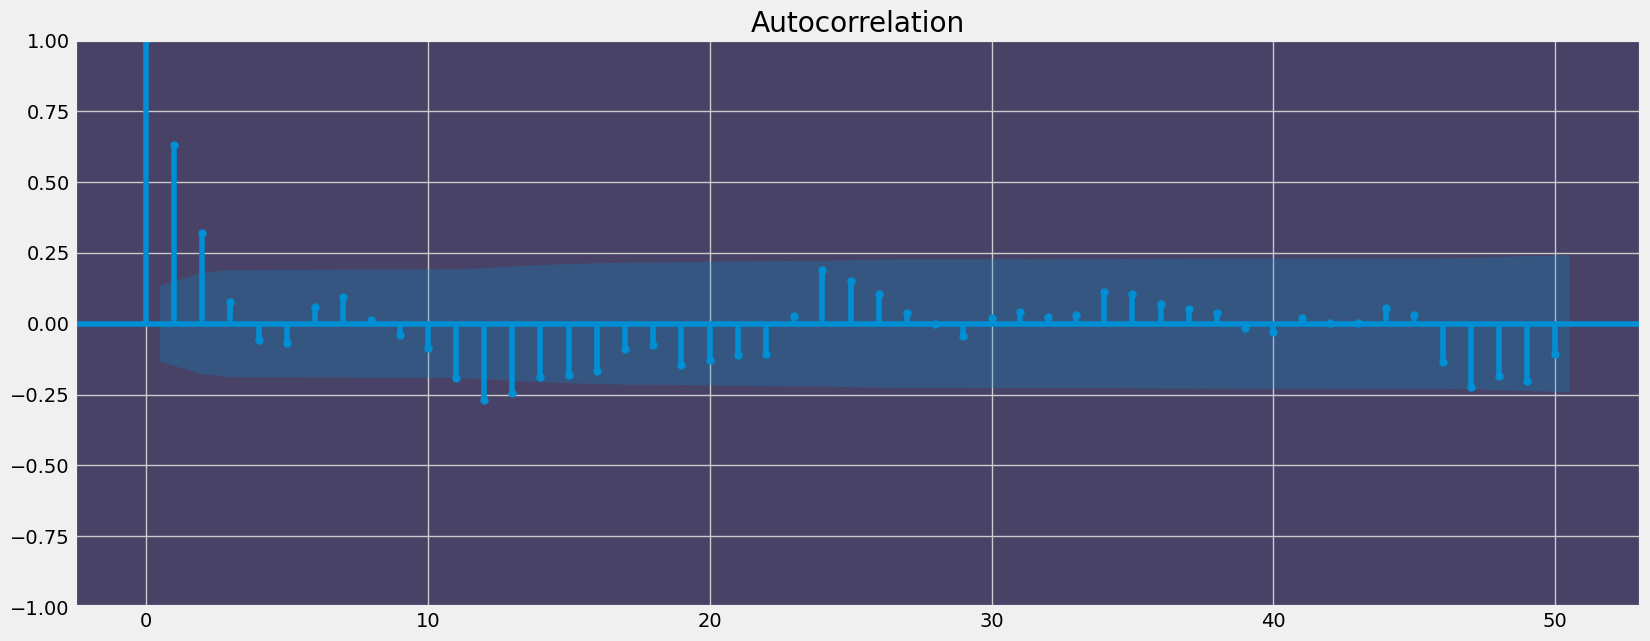

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals["residuals"], lags=50)

- ## Evaluamos el Modelo

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def metricas(y_true, y_pred, model_name):
    mae_ = mean_absolute_error(y_true, y_pred)
    rmse_ = mean_squared_error(y_true, y_pred, )
    mape_ = mean_absolute_percentage_error(y_true, y_pred)
    smape_ = mean_absolute_percentage_error(y_true, y_pred,)
    r2_ = r2_score(y_true, y_pred)
    
    dict_ = {'MAE': mae_, 'RMSE': rmse_, 
             'MAPE': mape_, 'SMAPE': smape_, "R2":r2_}
    
    metrica1 = pd.DataFrame(dict_, index = [model_name])
    return(metrica1.round(decimals = 4))

In [20]:
metricas(test1["y"], forecast["yhat1"][-30:], "NeuralProphet")

,MAE,RMSE,MAPE,SMAPE,R2
NeuralProphet,4886.1408,3.386033e+07,0.0441,0.0441,0.9539


# 8. Conclusión